In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from shapely import wkt

In [4]:
# Example: load a DSS dataset as a Pandas dataframe
mydataset = dataiku.Dataset("Zeeweg_Night_Day")
zeeweg = mydataset.get_dataframe()

In [5]:
# Example: load a DSS dataset as a Pandas dataframe
mydataset = dataiku.Dataset("wegvakken_v")
wegvakken = mydataset.get_dataframe()


In [6]:
#Alleen N200 wegen
df_n200 = wegvakken.loc[wegvakken['attributes.TRAJECT'] == 'N200a']

In [6]:
df_n200.head()

,attributes.AD_ID,attributes.NUMMER,attributes.OBJECTBEGINTIJD,attributes.OBJECTEINDTIJD,attributes.OBJECTID,attributes.OMTREK,attributes.OPMERKING,attributes.OPPERVLAKTE,attributes.SHAPE.AREA,attributes.SHAPE.LEN,attributes.TRAJECT,attributes.VERWERKINGSSTATUS,geometry.rings,geometry
13,AD.172AAE23A7D1461499700842B98A6B76,61.0,1397174400000,NaN,1618,319.998820,NaN,5999.980307,5999.980307,319.998820,N200a,Actueel,"[[[101188.82189999893, 489956.9490999989], [10...","POLYGON ((101188.8218999989 489956.9490999989,..."
16,AD.CF53DD3ECE474F46B2B5F71DD300D86F,32.0,1397174400000,NaN,1740,319.999380,NaN,5999.997454,5999.997454,319.999380,N200a,Actueel,"[[[98586.69399999827, 490787.95800000057], [98...","POLYGON ((98586.69399999827 490787.9580000006,..."
17,AD.754EEBB1646B4052856190F459B4D47C,1.0,1397174400000,NaN,1765,323.021386,NaN,6071.088630,6071.088630,323.021386,N200a,Actueel,"[[[96902.81060000136, 489098.23530000076], [96...","POLYGON ((96902.81060000136 489098.2353000008,..."
37,AD.BE8A6AE04F4148DFB4581C56613C831C,60.0,1397174400000,NaN,3683,320.000075,NaN,5999.998236,5999.998236,320.000075,N200a,Actueel,"[[[101083.58049999923, 489969.58669999987], [1...","POLYGON ((101083.5804999992 489969.5866999999,..."
42,AD.959FBB050E7E40AE84EECFDBC161031E,28.0,1397174400000,NaN,3797,319.999094,NaN,5999.973932,5999.973932,319.999094,N200a,Actueel,"[[[98376.65799999982, 491009.9937000014], [983...","POLYGON ((98376.65799999982 491009.9937000014,..."


In [7]:
#get geo points from long and lat
geometry = [Point(xy) for xy in zip(zeeweg['X'], zeeweg['Y'])]

In [8]:
# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(zeeweg, crs='epsg:28992', geometry=geometry)

In [9]:
gdf

,col_0,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Datum,Tijd,Aantal,Diersoort,WildType,Geslacht,Doodsoorzaak,Longitude,Latitude,X,Y,Weekdatum,Year,Month,color,Day,Weekend,Daylight,geometry
0,0,0,0,279,2014-02-21 00:00:00,00:00:00,1,Damhert,MK,m,aanrijding,4.59101,52.394451,100806.7,489921.3,2014-02-17 00:00:00,2014,2,black,5,weekend,N,POINT (100806.7 489921.3)
1,1,1,1,285,2016-02-21 00:00:00,00:00:00,1,Damhert,HE,m,aanrijding,4.55553,52.403671,98403.6,490974.3,2016-02-15 00:00:00,2016,2,black,0,workday,N,POINT (98403.60000000001 490974.3)
2,2,2,2,289,2015-01-09 00:00:00,00:00:00,1,Damhert,HE,m,aanrijding,4.59138,52.394798,100832.3,489959.9,2015-01-05 00:00:00,2015,1,black,5,weekend,N,POINT (100832.3 489959.9)
3,3,3,3,291,2016-01-15 00:00:00,05:05:00,1,Damhert,SP,m,aanrijding,4.58457,52.397289,100371.9,490242.1,2016-01-11 00:00:00,2016,1,black,5,weekend,N,POINT (100371.9 490242.1)
4,4,4,4,292,2016-02-12 00:00:00,00:00:00,1,Damhert,HE,m,aanrijding,4.55920,52.401371,98650.4,490715.5,2016-02-08 00:00:00,2016,2,black,5,weekend,N,POINT (98650.39999999999 490715.5)
5,5,5,5,296,2014-01-29 00:00:00,00:00:00,1,Damhert,HI,v,aanrijding,4.57041,52.398109,99409.2,490344.1,2014-01-27 00:00:00,2014,1,black,3,workday,N,POINT (99409.2 490344.1)
6,6,6,6,300,2015-03-23 00:00:00,00:00:00,1,Ree,GEIT,v,aanrijding,4.55968,52.400620,98682.1,490631.7,2015-03-23 00:00:00,2015,3,black,1,workday,N,POINT (98682.10000000001 490631.7)
7,7,7,7,305,2016-08-16 00:00:00,08:05:00,1,Damhert,HI,v,aanrijding,4.57714,52.398140,99867.2,490342.3,2016-08-15 00:00:00,2016,8,black,2,workday,Y,POINT (99867.2 490342.3)
8,8,8,8,306,2015-01-12 00:00:00,00:00:00,1,Ree,VK,v,aanrijding,4.59020,52.394840,100752.0,489965.3,2015-01-12 00:00:00,2015,1,black,1,workday,N,POINT (100752 489965.3)
9,9,9,9,307,2015-02-17 00:00:00,20:00:00,1,Ree,GEIT,v,aanrijding,4.60235,52.391830,101575.4,489621.3,2015-02-16 00:00:00,2015,2,black,2,workday,N,POINT (101575.4 489621.3)


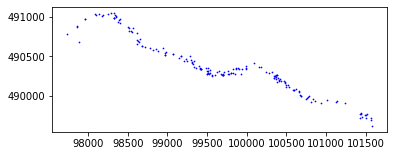

In [13]:
# Plot all points
gdf.plot(marker='o', color='b', markersize=0.5)


In [13]:
df_n200.head()

,attributes.AD_ID,attributes.NUMMER,attributes.OBJECTBEGINTIJD,attributes.OBJECTEINDTIJD,attributes.OBJECTID,attributes.OMTREK,attributes.OPMERKING,attributes.OPPERVLAKTE,attributes.SHAPE.AREA,attributes.SHAPE.LEN,attributes.TRAJECT,attributes.VERWERKINGSSTATUS,geometry.rings,geometry
13,AD.172AAE23A7D1461499700842B98A6B76,61.0,1397174400000,NaN,1618,319.998820,NaN,5999.980307,5999.980307,319.998820,N200a,Actueel,"[[[101188.82189999893, 489956.9490999989], [10...","POLYGON ((101188.8218999989 489956.9490999989,..."
16,AD.CF53DD3ECE474F46B2B5F71DD300D86F,32.0,1397174400000,NaN,1740,319.999380,NaN,5999.997454,5999.997454,319.999380,N200a,Actueel,"[[[98586.69399999827, 490787.95800000057], [98...","POLYGON ((98586.69399999827 490787.9580000006,..."
17,AD.754EEBB1646B4052856190F459B4D47C,1.0,1397174400000,NaN,1765,323.021386,NaN,6071.088630,6071.088630,323.021386,N200a,Actueel,"[[[96902.81060000136, 489098.23530000076], [96...","POLYGON ((96902.81060000136 489098.2353000008,..."
37,AD.BE8A6AE04F4148DFB4581C56613C831C,60.0,1397174400000,NaN,3683,320.000075,NaN,5999.998236,5999.998236,320.000075,N200a,Actueel,"[[[101083.58049999923, 489969.58669999987], [1...","POLYGON ((101083.5804999992 489969.5866999999,..."
42,AD.959FBB050E7E40AE84EECFDBC161031E,28.0,1397174400000,NaN,3797,319.999094,NaN,5999.973932,5999.973932,319.999094,N200a,Actueel,"[[[98376.65799999982, 491009.9937000014], [983...","POLYGON ((98376.65799999982 491009.9937000014,..."


In [14]:
# Creating a Geographic data frame 
df_n200['geometry'] = df_n200['geometry'].apply(wkt.loads)
gdf_n200 = gpd.GeoDataFrame(df_n200, crs='epsg:28992', geometry = 'geometry')

/home/dataiku/dss/code-envs/python/Gerda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


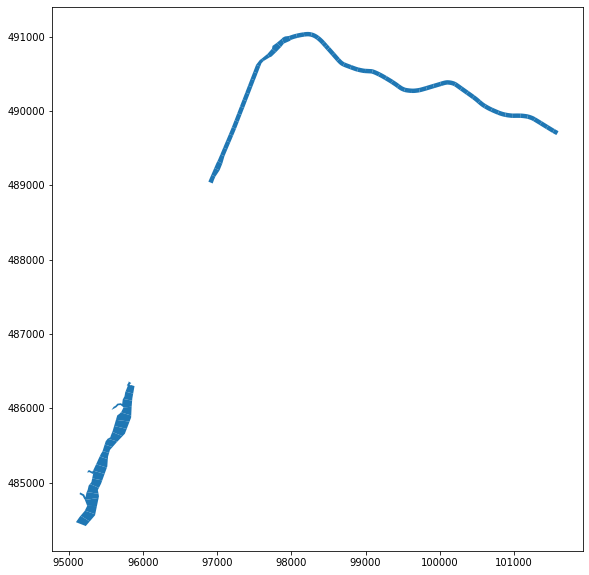

In [15]:
# Plot all points
fig, ax = plt.subplots(1, 1, figsize = (10,10))
gdf_n200.plot(ax=ax)

In [17]:
gdf.crs = "epsg:28992"

In [18]:
gdf_n200 = gdf_n200.to_crs('epsg:28992')
gdf = gdf.to_crs('epsg:28992')

In [19]:
gdf_n200.crs == gdf.crs

True

In [20]:
#spatial join
dvc_vakken = gpd.sjoin(gdf, gdf_n200, how="inner", op='intersects')

In [21]:
dvc_vakken

,col_0,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Datum,Tijd,Aantal,Diersoort,WildType,Geslacht,Doodsoorzaak,Longitude,Latitude,X,Y,Weekdatum,Year,Month,color,Day,Weekend,Daylight,geometry,index_right,attributes.AD_ID,attributes.NUMMER,attributes.OBJECTBEGINTIJD,attributes.OBJECTEINDTIJD,attributes.OBJECTID,attributes.OMTREK,attributes.OPMERKING,attributes.OPPERVLAKTE,attributes.SHAPE.AREA,attributes.SHAPE.LEN,attributes.TRAJECT,attributes.VERWERKINGSSTATUS,geometry.rings
1,1,1,1,285,2016-02-21 00:00:00,00:00:00,1,Damhert,HE,m,aanrijding,4.55553,52.403671,98403.6,490974.3,2016-02-15 00:00:00,2016,2,black,0,workday,N,POINT (98403.60000000001 490974.3),42,AD.959FBB050E7E40AE84EECFDBC161031E,28.0,1397174400000,NaN,3797,319.999094,NaN,5999.973932,5999.973932,319.999094,N200a,Actueel,"[[[98376.65799999982, 491009.9937000014], [983..."
10,10,10,10,311,2015-10-12 00:00:00,00:00:00,1,Damhert,HE,m,aanrijding,4.55555,52.403240,98404.4,490926.4,2015-10-12 00:00:00,2015,10,black,1,workday,N,POINT (98404.39999999999 490926.4),42,AD.959FBB050E7E40AE84EECFDBC161031E,28.0,1397174400000,NaN,3797,319.999094,NaN,5999.973932,5999.973932,319.999094,N200a,Actueel,"[[[98376.65799999982, 491009.9937000014], [983..."
30,30,30,31,372,2015-03-20 00:00:00,00:00:00,1,Ree,GEIT,v,aanrijding,4.55526,52.403549,98385.0,490961.1,2015-03-16 00:00:00,2015,3,black,5,weekend,N,POINT (98385 490961.1),42,AD.959FBB050E7E40AE84EECFDBC161031E,28.0,1397174400000,NaN,3797,319.999094,NaN,5999.973932,5999.973932,319.999094,N200a,Actueel,"[[[98376.65799999982, 491009.9937000014], [983..."
132,132,132,136,614,2020-02-05 00:00:00,18:30:00,1,Damhert,SP,m,aanrijding,4.55521,52.403290,98381.3,490932.2,2020-02-03 00:00:00,2020,2,red,3,workday,N,POINT (98381.3 490932.2),42,AD.959FBB050E7E40AE84EECFDBC161031E,28.0,1397174400000,NaN,3797,319.999094,NaN,5999.973932,5999.973932,319.999094,N200a,Actueel,"[[[98376.65799999982, 491009.9937000014], [983..."
2,2,2,2,289,2015-01-09 00:00:00,00:00:00,1,Damhert,HE,m,aanrijding,4.59138,52.394798,100832.3,489959.9,2015-01-05 00:00:00,2015,1,black,5,weekend,N,POINT (100832.3 489959.9),88,AD.03B5E0FE9168437FB0353CBB5C0576B6,57.0,1397174400000,NaN,5163,319.999568,NaN,5999.987546,5999.987546,319.999568,N200a,Actueel,"[[[100799.52670000121, 490008.5452999994], [10..."
104,104,104,108,583,2020-01-05 00:00:00,04:58:00,1,Damhert,SP,m,aanrijding,4.59183,52.394642,100862.7,489941.8,2019-12-30 00:00:00,2020,1,red,0,workday,N,POINT (100862.7 489941.8),88,AD.03B5E0FE9168437FB0353CBB5C0576B6,57.0,1397174400000,NaN,5163,319.999568,NaN,5999.987546,5999.987546,319.999568,N200a,Actueel,"[[[100799.52670000121, 490008.5452999994], [10..."
3,3,3,3,291,2016-01-15 00:00:00,05:05:00,1,Damhert,SP,m,aanrijding,4.58457,52.397289,100371.9,490242.1,2016-01-11 00:00:00,2016,1,black,5,weekend,N,POINT (100371.9 490242.1),5631,AD.4334334F89684EDE855197779C14E4CF,52.0,1397174400000,NaN,1619,319.999904,NaN,6000.003998,6000.003998,319.999904,N200a,Actueel,"[[[100386.78460000083, 490273.35390000045], [1..."
17,17,17,18,333,2015-03-15 00:00:00,00:00:00,1,Ree,SMR,v,aanrijding,4.58447,52.397049,100364.8,490215.5,2015-03-09 00:00:00,2015,3,black,0,workday,N,POINT (100364.8 490215.5),5631,AD.4334334F89684EDE855197779C14E4CF,52.0,1397174400000,NaN,1619,319.999904,NaN,6000.003998,6000.003998,319.999904,N200a,Actueel,"[[[100386.78460000083, 490273.35390000045], [1..."
61,61,61,63,481,2016-01-15 00:00:00,17:39:00,1,Damhert,SP,m,aanrijding,4.58542,52.396832,100429.1,490190.3,2016-01-11 00:00:00,2016,1,black,5,weekend,N,POINT (100429.1 490190.3),5631,AD.4334334F89684EDE855197779C14E4CF,52.0,1397174400000,NaN,1619,319.999904,NaN,6000.003998,6000.003998,319.999904,N200a,Actueel,"[[[100386.78460000083, 490273.35390000045], [1..."
75,75,75,77,529,2015-03-08 00:00:00,00:45:00,1,Damhert,MK,m,aanrijding,4.58484,52.397160,100390.1,490227.4,2015-03-02 00:00:00,2015,3,black,0,workday,N,POINT (100390.1 490227.4),5631,AD.4334334F89684EDE855197779C14E4CF,52.0,1397174400000,NaN,1619,319.999904,NaN,6000.003998,

In [22]:
dvc = dvc_vakken[['geometry', 'attributes.AD_ID', 'attributes.NUMMER']]

In [23]:
dvc

,geometry,attributes.AD_ID,attributes.NUMMER
1,POINT (98403.60000000001 490974.3),AD.959FBB050E7E40AE84EECFDBC161031E,28.0
10,POINT (98404.39999999999 490926.4),AD.959FBB050E7E40AE84EECFDBC161031E,28.0
30,POINT (98385 490961.1),AD.959FBB050E7E40AE84EECFDBC161031E,28.0
132,POINT (98381.3 490932.2),AD.959FBB050E7E40AE84EECFDBC161031E,28.0
2,POINT (100832.3 489959.9),AD.03B5E0FE9168437FB0353CBB5C0576B6,57.0
104,POINT (100862.7 489941.8),AD.03B5E0FE9168437FB0353CBB5C0576B6,57.0
3,POINT (100371.9 490242.1),AD.4334334F89684EDE855197779C14E4CF,52.0
17,POINT (100364.8 490215.5),AD.4334334F89684EDE855197779C14E4CF,52.0
61,POINT (100429.1 490190.3),AD.4334334F89684EDE855197779C14E4CF,52.0
75,POINT (100390.1 490227.4),AD.4334334F89684EDE855197779C14E4CF,52.0


In [24]:
#Create dictionary with road segment and number of DVCs
wegvak_total = {}
for i in dvc['attributes.AD_ID'].unique():
    wegvak_total[i] = len(dvc[dvc['attributes.AD_ID'] == i])

In [43]:
wegvak_total

{'AD.959FBB050E7E40AE84EECFDBC161031E': 4,
 'AD.03B5E0FE9168437FB0353CBB5C0576B6': 2,
 'AD.4334334F89684EDE855197779C14E4CF': 7,
 'AD.FF8DD65EF097400A8DD0D23BA36D8CFA': 6,
 'AD.11334A94261142B48D9ADBE97ECBD5E4': 5,
 'AD.8574539AF23944949C3BB4D5B99B5B21': 6,
 'AD.B90B5BFBA63342EC908EE7132EF8E2B3': 4,
 'AD.D581DD6EE76F41E8BDD9623FBFF34755': 5,
 'AD.B2C9A23CC58A4E4484ACB8E533CEE191': 5,
 'AD.895DD2FA39384E4EAE0107092232D163': 6,
 'AD.D7D1EDEB970045F8AC51906A91A0F30C': 7,
 'AD.2831C53D28AF4A5BA848F8BC0F840FC7': 1,
 'AD.3A74F2E309824130BBA9F9140A7894D4': 4,
 'AD.77DBC8B913CB41FE8DF01E3700AA44CB': 2,
 'AD.9F39E7947B8447CCB99F7F832A66403B': 10,
 'AD.F7540BC16D424F5989E8A03A6A79CCA1': 3,
 'AD.87C56F44000648C59683BB61BEA3101A': 2,
 'AD.18C0EBCF88EA439FB86D5AECF58A5D31': 1,
 'AD.782F1CC105B54D939EB48630E928A23A': 6,
 'AD.046CEDD266484D36A82EA354985AB516': 5,
 'AD.5241A07C57A14A329916BE81DEDBB51A': 2,
 'AD.22D70BDC971E47C4A106ECE0C70102F2': 2,
 'AD.72FFE8CB1D84487D92C5B904928D57A2': 5,
 'AD.43D87

In [38]:
#create dataframe of segments and DVCs
dvc_per_wegvak = pd.DataFrame()
dvc_per_wegvak['WEGVAK'] = gdf_n200['attributes.AD_ID'] 
dvc_per_wegvak['DVC'] = dvc_per_wegvak['WEGVAK'].map(wegvak_total)
dvc_per_wegvak['DVC'] = dvc_per_wegvak['DVC'].fillna(0)
dvc_per_wegvak

,WEGVAK,DVC
13,AD.172AAE23A7D1461499700842B98A6B76,1.0
16,AD.CF53DD3ECE474F46B2B5F71DD300D86F,1.0
17,AD.754EEBB1646B4052856190F459B4D47C,0.0
37,AD.BE8A6AE04F4148DFB4581C56613C831C,2.0
42,AD.959FBB050E7E40AE84EECFDBC161031E,4.0
43,AD.5BCA10F8C38947ECA1FE34540DDB57D4,0.0
44,AD.F7540BC16D424F5989E8A03A6A79CCA1,3.0
52,AD.4058513BBCA9480BAE82D8914089D754,0.0
53,AD.A1B29DA2A54348C2967990464AB0AB4D,0.0
58,AD.782F1CC105B54D939EB48630E928A23A,6.0
